# [TEST] PDDLStream-test-samples-ikmp-analysis-comparemine

In [1]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

In [1]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

IK_NUMS = [4, 8]
RESULT_PATHS = []
IK_DIR_FORM = "stowing-deep-result-analysis-ik{:03}-mp2fix"
for ik_num in IK_NUMS:
    RES_ROOT = IK_DIR_FORM.format(ik_num)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

HEADS = ["plan_time", "length", "MP_count", "failed_MPs", "IK_count", "failed_IKs", "success"]

def run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=['None', 'Tool', 'ToolReach', 'Full']):
    N_DAT = I_END-I_START
    ROBOT_DATA_ROOT = os.path.join(TEST_DATA_PATH, RTYPE)
    DATASET_PATH = os.path.join(ROBOT_DATA_ROOT, DAT_DIR)
    file_list = sorted(os.listdir(DATASET_PATH))

    gtimer = GlobalTimer.instance()
    gtimer.reset(scale=1, timeunit='s')

    gtimer.tic("full_loop")
    for fid in range(I_START, I_END):
        e_step_list = []
        for i_c, cname in enumerate(CNAME_LIST):
            gtimer.tic("step")
            p = subprocess.Popen(['python', '{}src/scripts/developing/pddlstream/test_saved_scene.py'.format(RNB_PLANNING_DIR),
                                  '--data_idx', str(fid), '--file_option', FILE_OPTION, '--cname', cname,]
                                 + common_args)
            p.wait()
            e_step = np.round(gtimer.toc("step"), 1)
            e_step_list.append(e_step)
            print("------- " + ("{:<8}"*len(e_step_list)).format(*e_step_list) + "-------", end="\r")

        print("")
        print("========== {} / {} (eta: {} / {} s) =========".format(
            fid+1, N_DAT, *np.round(gtimer.eta("full_loop", fid-I_START+1, N_DAT), 1)))

## Common params

In [2]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 50


CNAME_LIST = ['None', 'Full']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 2
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = 30
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

# test loop

In [3]:
for ik_num, res_path in zip(IK_NUMS, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--IK_TRY_NUM")+1] = str(ik_num)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 18.5    15.2    -------
========== 1 / 50 (eta: 33.7 / 1683.9 s) =========
------- 14.7    15.1    -------
========== 2 / 50 (eta: 63.5 / 1587.3 s) =========
------- 18.0    16.0    -------
========== 3 / 50 (eta: 97.5 / 1625.3 s) =========
------- 16.9    15.1    -------
========== 4 / 50 (eta: 129.5 / 1619.3 s) =========
------- 14.3    15.2    -------
========== 5 / 50 (eta: 159.1 / 1590.7 s) =========
------- 15.2    15.0    -------
========== 6 / 50 (eta: 189.3 / 1577.6 s) =========
------- 14.4    14.8    -------
========== 7 / 50 (eta: 218.5 / 1561.0 s) =========
------- 14.3    14.7    -------
========== 8 / 50 (eta: 247.5 / 1547.1 s) =========
------- 16.2    17.3    -------
========== 9 / 50 (eta: 281.1 / 1561.5 s) =========
------- 21.0    15.0    -------
========== 10 / 50 (eta: 317.1 / 1585.5 s) =========
------- 15.1    15.5    -------
========== 11 / 50 (eta: 347.7 / 1580.6 s) =========
------- 15.8    18.5    -------
========== 12 / 50 (eta: 382.0 / 1591.8 s) ==

------- 24.7    17.6    -------
========== 47 / 50 (eta: 1763.4 / 1876.0 s) =========
------- 14.3    15.3    -------
========== 48 / 50 (eta: 1793.0 / 1867.7 s) =========
------- 19.9    15.6    -------
========== 49 / 50 (eta: 1828.6 / 1865.9 s) =========
------- 14.7    15.0    -------
========== 50 / 50 (eta: 1858.3 / 1858.3 s) =========
------- 16.7    17.0    -------
========== 1 / 50 (eta: 33.7 / 1682.9 s) =========
------- 24.4    32.9    -------
========== 2 / 50 (eta: 91.0 / 2275.4 s) =========
------- 15.0    15.2    -------
========== 3 / 50 (eta: 121.3 / 2020.9 s) =========
------- 16.1    17.8    -------
========== 4 / 50 (eta: 155.2 / 1939.7 s) =========
------- 17.3    15.4    -------
========== 5 / 50 (eta: 187.9 / 1878.8 s) =========
------- 21.3    19.6    -------
========== 6 / 50 (eta: 228.8 / 1906.3 s) =========
------- 16.8    17.1    -------
========== 7 / 50 (eta: 262.7 / 1876.5 s) =========
------- 15.5    15.9    -------
========== 8 / 50 (eta: 294.1 / 1838.4

------- 22.0    15.6    -------
========== 43 / 50 (eta: 1617.2 / 1880.5 s) =========
------- 22.5    15.4    -------
========== 44 / 50 (eta: 1655.2 / 1880.9 s) =========
------- 23.3    22.4    -------
========== 45 / 50 (eta: 1700.9 / 1889.9 s) =========
------- 17.2    15.6    -------
========== 46 / 50 (eta: 1733.7 / 1884.5 s) =========
------- 22.3    15.9    -------
========== 47 / 50 (eta: 1771.8 / 1884.9 s) =========
------- 15.2    15.6    -------
========== 48 / 50 (eta: 1802.7 / 1877.8 s) =========
------- 23.6    21.3    -------
========== 49 / 50 (eta: 1847.6 / 1885.3 s) =========
------- 14.8    17.4    -------
========== 50 / 50 (eta: 1879.8 / 1879.8 s) =========
------- 18.4    21.5    -------
========== 1 / 50 (eta: 39.9 / 1996.8 s) =========
------- 35.8    19.8    -------
========== 2 / 50 (eta: 95.6 / 2389.4 s) =========
------- 21.0    15.2    -------
========== 3 / 50 (eta: 131.8 / 2197.1 s) =========
------- 16.7    15.3    -------
========== 4 / 50 (eta: 163.9 

------- 29.7    21.5    -------
========== 39 / 50 (eta: 2038.5 / 2613.5 s) =========
------- 16.0    19.5    -------
========== 40 / 50 (eta: 2074.1 / 2592.6 s) =========
------- 16.9    17.9    -------
========== 41 / 50 (eta: 2108.9 / 2571.8 s) =========
------- 18.2    23.1    -------
========== 42 / 50 (eta: 2150.2 / 2559.7 s) =========
------- 14.6    16.0    -------
========== 43 / 50 (eta: 2180.8 / 2535.8 s) =========
------- 51.5    18.8    -------
========== 44 / 50 (eta: 2251.1 / 2558.0 s) =========
------- 15.1    16.0    -------
========== 45 / 50 (eta: 2282.2 / 2535.8 s) =========
------- 22.4    18.2    -------
========== 46 / 50 (eta: 2322.8 / 2524.8 s) =========
------- 17.0    15.9    -------
========== 47 / 50 (eta: 2355.7 / 2506.1 s) =========
------- 114.5   115.2   -------
========== 48 / 50 (eta: 2585.5 / 2693.2 s) =========
------- 17.4    15.8    -------
========== 49 / 50 (eta: 2618.7 / 2672.2 s) =========
------- 25.0    24.8    -------
========== 50 / 50 (et

------- 19.5    18.1    -------
========== 35 / 50 (eta: 1142.0 / 1631.4 s) =========
------- 14.5    15.5    -------
========== 36 / 50 (eta: 1171.9 / 1627.7 s) =========
------- 21.0    17.9    -------
========== 37 / 50 (eta: 1210.9 / 1636.3 s) =========
------- 18.7    14.8    -------
========== 38 / 50 (eta: 1244.4 / 1637.3 s) =========
------- 18.4    16.6    -------
========== 39 / 50 (eta: 1279.4 / 1640.2 s) =========
------- 14.7    15.9    -------
========== 40 / 50 (eta: 1310.0 / 1637.6 s) =========
------- 18.2    15.4    -------
========== 41 / 50 (eta: 1343.7 / 1638.6 s) =========
------- 16.5    16.0    -------
========== 42 / 50 (eta: 1376.2 / 1638.3 s) =========
------- 14.9    17.9    -------
========== 43 / 50 (eta: 1409.0 / 1638.4 s) =========
------- 15.3    15.7    -------
========== 44 / 50 (eta: 1440.1 / 1636.4 s) =========
------- 15.6    15.2    -------
========== 45 / 50 (eta: 1470.9 / 1634.3 s) =========
------- 15.0    15.3    -------
========== 46 / 50 (et

------- 15.3    15.7    -------
========== 31 / 50 (eta: 1183.5 / 1908.9 s) =========
------- 15.3    15.4    -------
========== 32 / 50 (eta: 1214.3 / 1897.3 s) =========
------- 18.5    16.2    -------
========== 33 / 50 (eta: 1249.0 / 1892.4 s) =========
------- 50.8    38.1    -------
========== 34 / 50 (eta: 1337.8 / 1967.4 s) =========
------- 28.4    16.2    -------
========== 35 / 50 (eta: 1382.5 / 1975.0 s) =========
------- 65.0    33.6    -------
========== 36 / 50 (eta: 1481.1 / 2057.1 s) =========
------- 20.2    15.7    -------
========== 37 / 50 (eta: 1517.0 / 2050.0 s) =========
------- 16.3    15.5    -------
========== 38 / 50 (eta: 1548.8 / 2037.9 s) =========
------- 17.0    15.7    -------
========== 39 / 50 (eta: 1581.5 / 2027.6 s) =========
------- 15.2    15.4    -------
========== 40 / 50 (eta: 1612.2 / 2015.2 s) =========
------- 14.7    15.3    -------
========== 41 / 50 (eta: 1642.2 / 2002.6 s) =========
------- 17.1    16.4    -------
========== 42 / 50 (et

------- 16.2    15.5    -------
========== 27 / 50 (eta: 1487.4 / 2754.4 s) =========
------- 15.8    16.5    -------
========== 28 / 50 (eta: 1519.7 / 2713.7 s) =========
------- 19.9    15.4    -------
========== 29 / 50 (eta: 1555.0 / 2681.0 s) =========
------- 17.0    26.9    -------
========== 30 / 50 (eta: 1598.9 / 2664.8 s) =========
------- 18.7    15.2    -------
========== 31 / 50 (eta: 1632.8 / 2633.6 s) =========
------- 21.9    15.7    -------
========== 32 / 50 (eta: 1670.5 / 2610.1 s) =========
------- 16.9    15.6    -------
========== 33 / 50 (eta: 1703.0 / 2580.3 s) =========
------- 24.0    104.0   -------
========== 34 / 50 (eta: 1831.0 / 2692.7 s) =========
------- 18.4    19.6    -------
========== 35 / 50 (eta: 1869.1 / 2670.1 s) =========
------- 84.2    117.8   -------
========== 36 / 50 (eta: 2071.1 / 2876.5 s) =========
------- 15.3    15.9    -------
========== 37 / 50 (eta: 2102.3 / 2841.0 s) =========
------- 22.0    36.2    -------
========== 38 / 50 (et

------- 15.2    15.9    -------
========== 23 / 50 (eta: 1561.0 / 3393.5 s) =========
------- 15.1    15.6    -------
========== 24 / 50 (eta: 1591.7 / 3316.1 s) =========
------- 16.0    16.2    -------
========== 25 / 50 (eta: 1623.9 / 3247.8 s) =========
------- 19.2    19.0    -------
========== 26 / 50 (eta: 1662.1 / 3196.3 s) =========
------- 17.8    27.7    -------
========== 27 / 50 (eta: 1707.7 / 3162.3 s) =========
------- 19.2    16.5    -------
========== 28 / 50 (eta: 1743.4 / 3113.2 s) =========
------- 20.6    118.2   -------
========== 29 / 50 (eta: 1882.3 / 3245.3 s) =========
------- 47.5    19.2    -------
========== 30 / 50 (eta: 1948.9 / 3248.2 s) =========
------- 17.4    16.3    -------
========== 31 / 50 (eta: 1982.7 / 3197.9 s) =========
------- 18.8    18.8    -------
========== 32 / 50 (eta: 2020.3 / 3156.7 s) =========
------- 17.2    16.5    -------
========== 33 / 50 (eta: 2054.0 / 3112.1 s) =========
------- 16.1    16.4    -------
========== 34 / 50 (et

## plot results

In [12]:
from plot_scripts import *

In [13]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for ik_num in IK_NUMS:
        resdat_all, res_dict_all = print_results(RES_ROOT=IK_DIR_FORM.format(ik_num), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=True
                                                )
        cname_cur = "{:03}".format(ik_num)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: stowing-deep-result-analysis-ik001-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik002-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik004-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik008-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik016-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik032-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: stowing-deep-result-analysis-ik064-mp2fix
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']


Text(0.5,1,'success ratios tot')

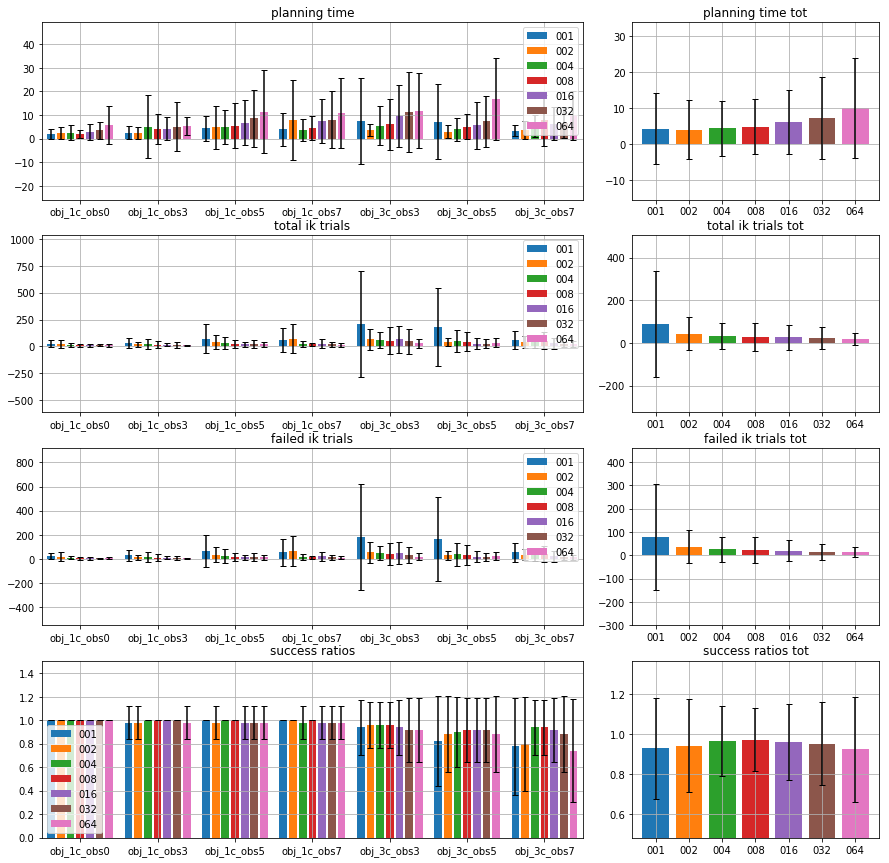

In [14]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS)
plt.title("total ik trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total ik trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS)
plt.title("failed ik trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed ik trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [15]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], succ_dict.values())) for ik_num in IK_NUMS]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], time_dict.values())) for ik_num in IK_NUMS]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc][min_idc], min_val))
print("="*80)

IK_NUMS:      1      2      4      8     16     32     64
success:  0.931  0.943  0.969  0.974  0.963  0.954  0.926
best: [8] (0.974)
--------------------------------------------------------------------------------
IK_NUMS:      1      2      4      8     16     32     64
times  :   4.34   4.04   4.42    4.8   6.13    7.2   10.1
best: [8] (  4.8)


In [16]:
IK_NUM_BEST = np.array(IK_NUMS)[max_idc][min_idc[0]]
print("IK_NUM_BEST: {}".format(IK_NUM_BEST))

IK_NUM_BEST: 8


In [4]:
1

1

# MP analysis

In [10]:
IK_TRY_NUM = 8
MP_TIMES = [8.0]
RESULT_PATHS = []
MP_DIR_FORM = "stowing-deep-result-analysis-ik{:03}_mp{:.3}"
for mp_time in MP_TIMES:
    RES_ROOT = MP_DIR_FORM.format(IK_TRY_NUM, mp_time)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

## Common params

In [11]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 50


CNAME_LIST = ['None', 'Full']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = IK_TRY_NUM
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

# test loop

In [ ]:
for mp_time, res_path in zip(MP_TIMES, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--TIMEOUT_MOTION")+1] = str(mp_time)
    print(common_args)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

## plot results

In [ ]:
from plot_scripts import *

In [ ]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for mp_time in MP_TIMES:
        resdat_all, res_dict_all = print_results(RES_ROOT=
                                                 MP_DIR_FORM.format(IK_TRY_NUM, mp_time), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=False
                                                )
        cname_cur = "{:03}".format(mp_time)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS)
plt.title("total mp trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["MP_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total mp trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS)
plt.title("failed mp trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_MPs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed mp trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [ ]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], succ_dict.values())) for mp_num in MP_TIMES]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(mp_num)], time_dict.values())) for mp_num in MP_TIMES]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("MP_TIMES: ", "  ".join(map(lambda x:"{:5}".format(x), MP_TIMES)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(MP_TIMES)[max_idc][min_idc], min_val))
print("="*80)